In [2]:
#Lib imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Warnings is filtered
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Seaborn style setting
sns.set(style ='whitegrid')

In [5]:
#Google drive mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Data reading
dataset_link = '/content/drive/MyDrive/Fraud Detection Using Machine Learning/AIML Dataset.csv'
df = pd.read_csv(dataset_link)

## Exploratory Data Analysis (EDA)

In [7]:
#Data inspecting
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
#df inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
#column inspection
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
#isFraud value counts
df["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [11]:
#show proportion of isFraud transactions
df["isFraud"].value_counts(normalize=True)

,proportion
isFraud,
0,0.998709
1,0.001291


In [12]:
#isFlaggedFraud value counts
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [13]:
#show proportion of isFlaggedFraud transactions
df["isFlaggedFraud"].value_counts(normalize=True)

,proportion
isFlaggedFraud,
0,0.999997
1,0.000003


In [14]:
#checking null values (columnwise total)
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [15]:
#checking null values (total)
int(df.isnull().sum().sum())

0

In [16]:
#checking the shape
df.shape

(6362620, 11)

In [17]:
#show the percentage of isFraud by using another method
round(float(df["isFraud"].value_counts()[1]/df.shape[0])*100,3)

0.129

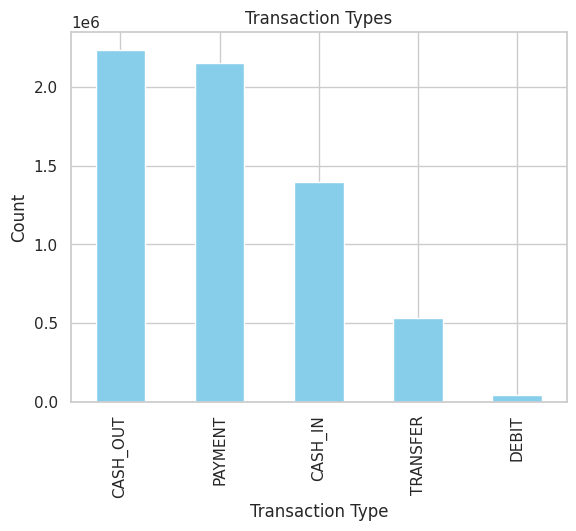

In [18]:
#visualizing data based on transaction types
df["type"].value_counts().plot(kind="bar", title = "Transaction Types", color = "skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

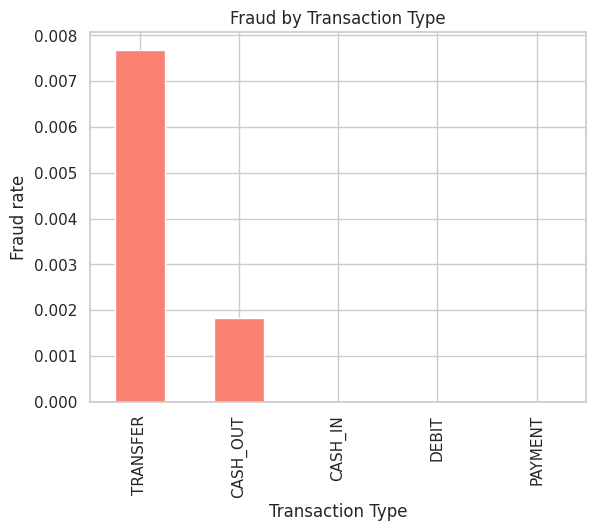

In [19]:
#visualizing isFraud data based on transaction types
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title = "Fraud by Transaction Type", color = "salmon")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud rate")
plt.show()

In [20]:
#show the raw data
fraud_by_type

,isFraud
type,
TRANSFER,0.007688
CASH_OUT,0.001840
CASH_IN,0.000000
DEBIT,0.000000
PAYMENT,0.000000


In [21]:
#analyze the amount of the transactions
df["amount"].describe().astype(int)

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


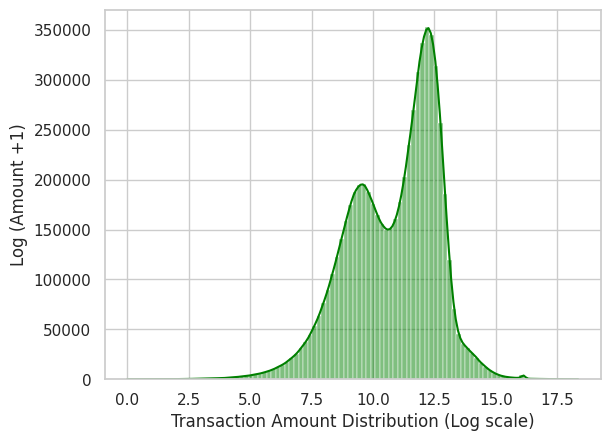

In [22]:
#visualizing the amount using histogram
sns.histplot(np.log1p(df["amount"]), bins = 100, kde = True, color = "green")
plt.xlabel("Transaction Amount Distribution (Log scale)")
plt.ylabel("Log (Amount +1)")
plt.show()

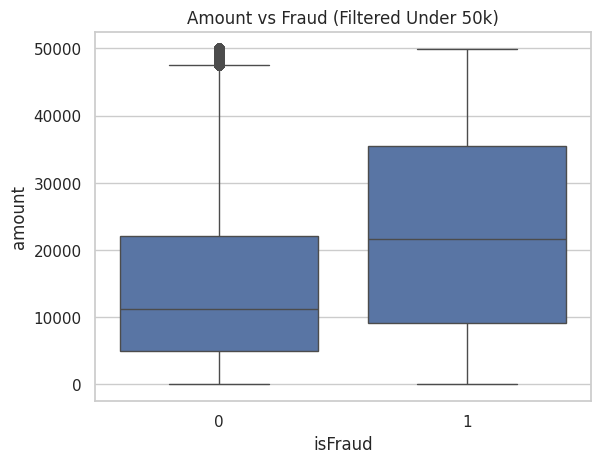

In [23]:
#analyzing the relationship between amount and isFraud under 50k
sns.boxplot(x = "isFraud", y = "amount", data = df[df["amount"] < 50000])
plt.title("Amount vs Fraud (Filtered Under 50k)")
plt.show()

In [24]:
#checking columns again
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [25]:
#checking the balances after transactions
df["balanceDiffOrig"] = df["newbalanceOrig"] - df["oldbalanceOrg"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [26]:
#show the balances which under 0
int((df["balanceDiffOrig"] < 0).sum())

2874330

In [27]:
int((df["balanceDiffDest"] < 0).sum())

1238864

In [28]:
#checking dataset again
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0


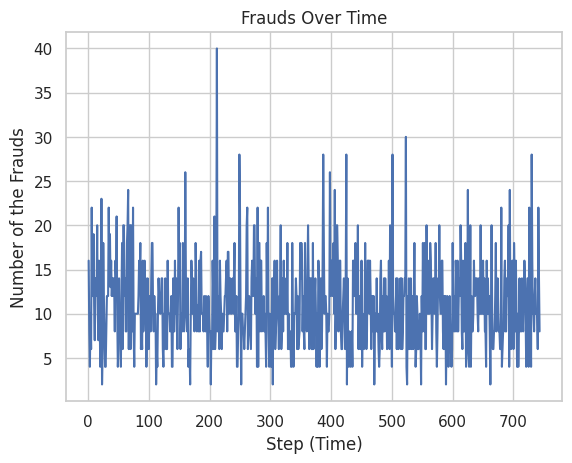

In [29]:
#lets analyze the the time of the isFraud transactions measured in hours since the start of the simulation.
#This will help to us to analyze When fraudulent transactions happen more often (e.g., at certain times).
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values, label ="Frauds per step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of the Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [30]:
#we can conclude that frauds is not time dependent. So this column is useless. We will drop it
df.drop(columns = ["step"], inplace = True)
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0


In [31]:
#analyzing the customers with customerwise. Determining the top senders and receivers
top_senders = df["nameOrig"].value_counts().head(10)
top_senders

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
C1462946854,3
C1065307291,3
C1999539787,3
C2098525306,3


In [32]:
top_receivers = df["nameDest"].value_counts().head(10)
top_receivers

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C1789550256,99
C451111351,99
C1360767589,98


In [33]:
#analyzing the customers with highFraud rate
highFraud_senders = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)
highFraud_senders

,count
nameOrig,
C1280323807,1
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C1039979813,1
C2089752665,1
C1614818636,1
C40604503,1


In [34]:
highFraud_receivers = df[df["isFraud"] == 1]["nameDest"].value_counts().head(10)
highFraud_receivers

,count
nameDest,
C1981613973,2
C410033330,2
C1366192319,2
C1655359478,2
C803116137,2
C52390890,2
C1325541393,2
C904300960,2
C2020337583,2


In [35]:
#analyzing the transaction types
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]
fraud_types

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,-181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,-181.00,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,-15325.00,46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,-705.00,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,-10835.00,2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,-339682.13,339682.13
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,-6311409.28,0.00
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,-6311409.28,6311409.27
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,-850002.52,0.00


In [36]:
fraud_types["type"].value_counts()

,count
type,
CASH_OUT,2237500
TRANSFER,532909


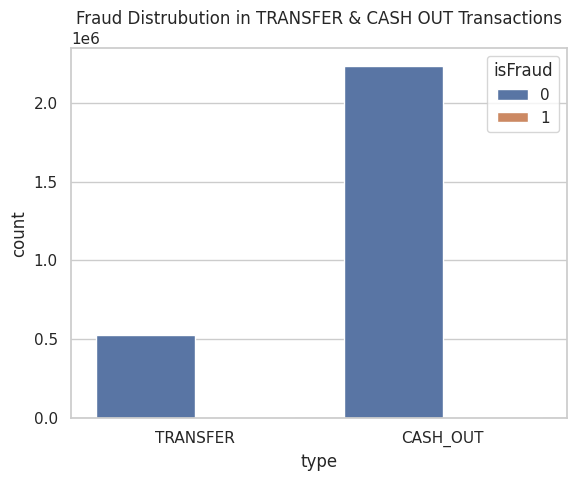

In [37]:
sns.countplot(x = "type", data = fraud_types, hue = "isFraud")
plt.title("Fraud Distrubution in TRANSFER & CASH OUT Transactions")
plt.show()

In [38]:
#correlation analysis of isFraud transaction with other columns
corr =  df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


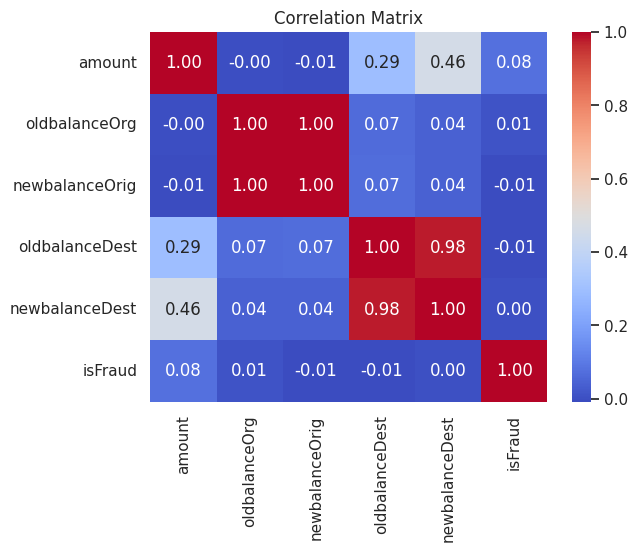

In [39]:
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [40]:
# Analyzing suspicious transactions with 0 balance after transfer
zero_after_transactions = df[
    (df['oldbalanceOrg'] > 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(["TRANSFER", "CASH_OUT"]))
]

In [41]:
len(zero_after_transactions)

1188074

In [42]:
zero_after_transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,-181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,-181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,-15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,-705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,-10835.0,2712905.89


## Feature engineering and Training ML Model

In [43]:
#checking class imbalance again
df["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [44]:
#lib imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [46]:
#check data again
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0


In [47]:
#dropping the useless columns in modelling
df_model = df.drop(columns = ["nameOrig","nameDest","isFlaggedFraud"])
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,-9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,-1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,-181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,-181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,-11668.14,0.0


In [60]:
#defining the categorical and numeric columns as list
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [61]:
#splitting the data into target and and independent columns
y = df["isFraud"]
X = df.drop(["isFraud"], axis = 1)

In [62]:
#splitting the data into train and test set. Stratify parameter is used to deal with class imbalance (keep the same ratio in original dataset distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [63]:
#Creating preprocessor object using ColumnTransformer which used to apply different transform techniques to different columns
#num and cat is a name after transformation. We used numeric and categorical column names as a parameter (listed above) and Standart and OneHotEncoder as a transformation techniques
#remainder parameter helps to use other columns keeping as the same
preprocessor =  ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(), categorical)
    ],
    remainder = "drop"
    )

In [64]:
#pipeline chains together multiple steps
#Data is preprocessed (e.g., scaling, encoding).
#class_weight automatically weights classes inversely to frequency (helps with imbalance)
#max_iter gives the solver more iterations to converge on tougher problems.
pipeline = Pipeline ([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight= "balanced", max_iter = 1000))
])

In [65]:
#applying fit method to pipeline object. This will apply all preprocessing and model fitting steps and will return pipeline object
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OneHotEncoder(),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [69]:
#testing the model built on X_test set
y_pred = pipeline.predict(X_test)

In [72]:
#printing classification report on test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



# 📊 Model Evaluation Summary & Next Steps

## 1. Current Results (Problem Overview)
- **Accuracy: 95%** → Misleading due to strong class imbalance (≈1.9M negatives vs ≈2.5K positives).  
- **Class 0 (majority):**
  - Precision: 1.00, Recall: 0.95, F1: 0.97 → Excellent performance.  
- **Class 1 (minority):**
  - Precision: 0.02 (very poor)  
  - Recall: 0.94 (very high)  
  - F1: 0.04 (very weak)  
- **Macro F1: 0.51** → True reflection of imbalance.  
- **Weighted F1: 0.97** → Inflated by majority class.  

👉 The model is **biased toward recall** for the minority class but suffers from **extremely low precision**.

---

## 2. Why This Matters
- Accuracy and weighted metrics hide the issue.  
- In real applications, the balance between **false positives** and **false negatives** depends on the domain:  
  - Fraud / disease detection → prioritize **recall**.  
  - Spam filters / user bans → prioritize **precision**.  

---

## 3. How to Improve

### Data-Level
- **Oversampling** (SMOTE, ADASYN) → add minority samples.  
- **Undersampling** → reduce majority samples (risk: lose info).  
- **Synthetic data generation** → create realistic minority samples.

### Algorithm-Level
- **Class weights** → increase penalty for misclassifying minority class.  
- **Anomaly detection** → reframe if positives are very rare.

### Threshold Tuning
- Default cutoff (0.5) may be too low.  
- **Raise the decision threshold** (e.g., 0.7, 0.8) → higher precision, lower recall.  
- Choose threshold by maximizing **F1** or **PR-AUC**.

### Evaluation Metrics
- Don’t rely on accuracy.  
- Use **Precision, Recall, F1 per class, PR-AUC, confusion matrix**.

---

## 4. Key Takeaway
The model:
- **Excellent at finding positives (high recall).**
- **Terrible at being confident about them (low precision).**

### 👉 Next Step
We will proceed the model built. But if we would like to improve the model, we could use the techniques listed above.

In [73]:
#obtaining the confusion matrix based on test dataset results
confusion_matrix(y_test, y_pred)

array([[1804118,  102204],
       [    158,    2306]])

In [74]:
#obtaining score of the model built
#We will proceed this model but we could improve the model using some undersampling and oversampling methods to deal with class imbalances.
pipeline.score(X_test, y_test)

0.94637324456487

In [75]:
#model dumping as a pickle file to use further
import joblib
joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']